##**Importing Required Libraries**

In [ ]:
import tensorflow as tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print('Tensorflow Version:',tensorflow.__version__)

Tensorflow Version: 2.2.0


## <b> Load the  Dataset

In [ ]:
!wget  https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv

--2020-08-02 10:57:47--  https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/n8bninud94blch4/fer2013.csv [following]
--2020-08-02 10:57:47--  https://www.dropbox.com/s/raw/n8bninud94blch4/fer2013.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc273a8f0fbeae1b96bedd2e0789.dl.dropboxusercontent.com/cd/0/inline/A8sNZnx3yWtcisjgIYO8aoJo-FmgjbwYV_DKNc_nQNbtMFOMIY14i7B9u4R7wlFSbRxcZeXxA1RM3xHbxZdMnaL7dO52XbhcMk2hBEPuk0KmP6glUlfg45KG2F51oA-7mYY/file# [following]
--2020-08-02 10:57:47--  https://uc273a8f0fbeae1b96bedd2e0789.dl.dropboxusercontent.com/cd/0/inline/A8sNZnx3yWtcisjgIYO8aoJo-FmgjbwYV_DKNc_nQNbtMFOMIY14i7B9u4R7wlFSbRxcZeXxA1RM3xHbxZdMnaL7dO52XbhcMk2hBEPuk0KmP6glUlfg4

In [ ]:
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df = pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head()

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training


## **Prepare the dataset for the model**

In [ ]:
# Images are of 48x48 pixels
# No. of Images = 35887

def getData(filname):
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [ ]:
filname= "fer2013.csv"
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [ ]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1) #Reshaping the images present in the dataset

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

## **CNN Model Architecture**

In [ ]:
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last'))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

#training the model
model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_test), np.array(y_test)),
          shuffle=True)

#saving the  model to be used later
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")
print("Saved model to disk")

Epoch 1/100
505/505 [==============================] - 23s 46ms/step - loss: 1.9584 - accuracy: 0.2167 - val_loss: 1.8139 - val_accuracy: 0.2561
Epoch 2/100
505/505 [==============================] - 22s 43ms/step - loss: 1.8257 - accuracy: 0.2439 - val_loss: 1.8085 - val_accuracy: 0.2563
Epoch 3/100
505/505 [==============================] - 22s 43ms/step - loss: 1.8013 - accuracy: 0.2510 - val_loss: 1.7940 - val_accuracy: 0.2747
Epoch 4/100
505/505 [==============================] - 22s 44ms/step - loss: 1.7174 - accuracy: 0.2996 - val_loss: 1.9596 - val_accuracy: 0.2279
Epoch 5/100
505/505 [==============================] - 22s 44ms/step - loss: 1.5813 - accuracy: 0.3745 - val_loss: 1.5636 - val_accuracy: 0.3742
Epoch 6/100
505/505 [==============================] - 22s 44ms/step - loss: 1.4869 - accuracy: 0.4134 - val_loss: 1.4438 - val_accuracy: 0.4280
Epoch 7/100
505/505 [==============================] - 22s 44ms/step - loss: 1.4375 - accuracy: 0.4431 - val_loss: 1.3838 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model.predict(X_test), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

CNN Model Accuracy on test set: 0.6690


## **Saving Model and predicting uploaded images**

In [ ]:
model.save("fer.h5")

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# Loading the Model
loaded_model = load_model('/content/fer.h5')

In [ ]:
from google.colab import files
files.upload()

Saving angryman.jfif to angryman.jfif


{'angryman.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x12\x12\x16\x15\x15\x17\x18\x18\x18\x15\x15\x17\x18\x18\x15\x15\x1a\x16\x15\x17\x17\x17\x17\x15\x17\x17\x1a\x1d( \x18\x1a%\x1b\x17\x15!1!%)+...\x18\x1f383,7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1a-%\x1f%--------------------------------------------------\xff\xc0\x00\x11\x08\x00\xa8\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00B\x10\x00\x01\x03\x02\x03\x05\x05\x06\x04\x05\x04\x00\x06\x03\x00\x00\x01\x00\x02\x11\x03!\x04\x121\x05AQaq\x06"\x81\x91\xa1\x132\xb1\xc1\xd1\xf0\x07BR\x82\x14#br\xe13\x92\xc2\xf14CSc\xa2\xb2\x15$%\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00"\x11\x01\x01\x00\x02\x02\x03\x00\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11!1\x

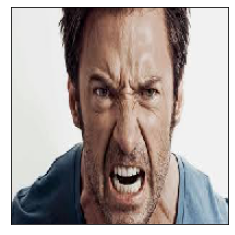

Expression Prediction: Angry


In [ ]:
from skimage import io
import warnings
warnings.filterwarnings("ignore")

img = image.load_img('angryman.jfif', grayscale=True, target_size=(48, 48))
show_img=image.load_img('angryman.jfif', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
 #print(custom[0])
#emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.xticks([])
plt.yticks([])

plt.show()

objects = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

## **Use OpenCV and Haar Cascade File to check the emotion in real time**

In [ ]:
from google.colab import files
files.upload()

Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml


{'haarcascade_frontalface_default.xml': b'<?xml version="1.0"?>\n<!--\n    Stump-based 24x24 discrete(?) adaboost frontal face detector.\n    Created by Rainer Lienhart.\n\n////////////////////////////////////////////////////////////////////////////////////////\n\n  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.\n\n  By downloading, copying, installing or using the software you agree to this license.\n  If you do not agree to this license, do not download, install,\n  copy or use the software.\n\n\n                        Intel License Agreement\n                For Open Source Computer Vision Library\n\n Copyright (C) 2000, Intel Corporation, all rights reserved.\n Third party copyrights are property of their respective owners.\n\n Redistribution and use in source and binary forms, with or without modification,\n are permitted provided that the following conditions are met:\n\n   * Redistribution\'s of source code must retain the above copyright notice,\n     this l

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

loaded_model = load_model('/content/fer.h5')


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = loaded_model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

## **Summary**

I was able to achieve a validation accuracy of 66.6%. The model Architecture is as shown:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5